## Carga de base de datos
Anuncios de inmuebles de alquiler turístico en las principales plataformas.

#### Importación de bibliotecas

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Conexión a MySQL

In [3]:
def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()


Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025'].


C:\Users\Ivan\AppData\Local\Temp\ipykernel_31084\1596814766.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"
Se creó el dataframe "Tourist_Accommodation10032025"


## Exploración inicial

In [4]:
# se carga como df la TABLA MÁS RECIENTE
df = Tourist_Accommodation10032025
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


### Tamaño

In [5]:
df.shape

(15000, 35)

### Tipos de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 15000 non-null  int64  
 1   name                         14996 non-null  object 
 2   description                  14790 non-null  object 
 3   host_id                      15000 non-null  int64  
 4   neighbourhood_name           15000 non-null  object 
 5   neighbourhood_district       9111 non-null   object 
 6   room_type                    15000 non-null  object 
 7   accommodates                 15000 non-null  int64  
 8   bathrooms                    14885 non-null  object 
 9   bedrooms                     14893 non-null  object 
 10  beds                         14940 non-null  float64
 11  amenities_list               14975 non-null  object 
 12  price                        14622 non-null  float64
 13  minimum_nights  

#### Corrección de tipos de datos

In [7]:
# conversión a numérico
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')

# conversión a booleano
df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
df['has_availability'] = df['has_availability'].astype(bool)

df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
df['is_instant_bookable'] = df['is_instant_bookable'].astype(bool)

# conversión a fechas
df["first_review_date"] = pd.to_datetime(df["first_review_date"], errors="coerce")
df["last_review_date"] = pd.to_datetime(df["last_review_date"], errors="coerce")
df["insert_date"] = pd.to_datetime(df["insert_date"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 15000 non-null  int64         
 1   name                         14996 non-null  object        
 2   description                  14790 non-null  object        
 3   host_id                      15000 non-null  int64         
 4   neighbourhood_name           15000 non-null  object        
 5   neighbourhood_district       9111 non-null   object        
 6   room_type                    15000 non-null  object        
 7   accommodates                 15000 non-null  int64         
 8   bathrooms                    14885 non-null  float64       
 9   bedrooms                     14893 non-null  float64       
 10  beds                         14940 non-null  float64       
 11  amenities_list               14975 non-nu

C:\Users\Ivan\AppData\Local\Temp\ipykernel_31084\3580156214.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
C:\Users\Ivan\AppData\Local\Temp\ipykernel_31084\3580156214.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
C:\Users\Ivan\AppData\Local\Temp\ipykernel_31084\3580156214.py:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (

### Duplicados

In [8]:
df.duplicated().sum()

np.int64(5000)

### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.27                 2.58     1.0       2.0      4.0       6.0     29.0
bathrooms                       1.60                 0.99     0.0       1.0      1.0       2.0     13.0
bedrooms                        1.93                 1.34     0.0       1.0      2.0       3.0     50.0
beds                            2.92                 2.26     0.0       1.0      2.0       4.0     30.0
price                        1024.61               990.07    60.0     450.0    750.0    1240.0  28571.0
minimum_nights                  4.96                18.51     1.0       1.0      2.0       4.0   1125.0
maximum_nights                759.17               498.38     1.0      62.0   1125.0    1125.0   1125.0
availability_30                12.93                11.81     0.0       0.0     11.0      26.0     30.0
availability_60            

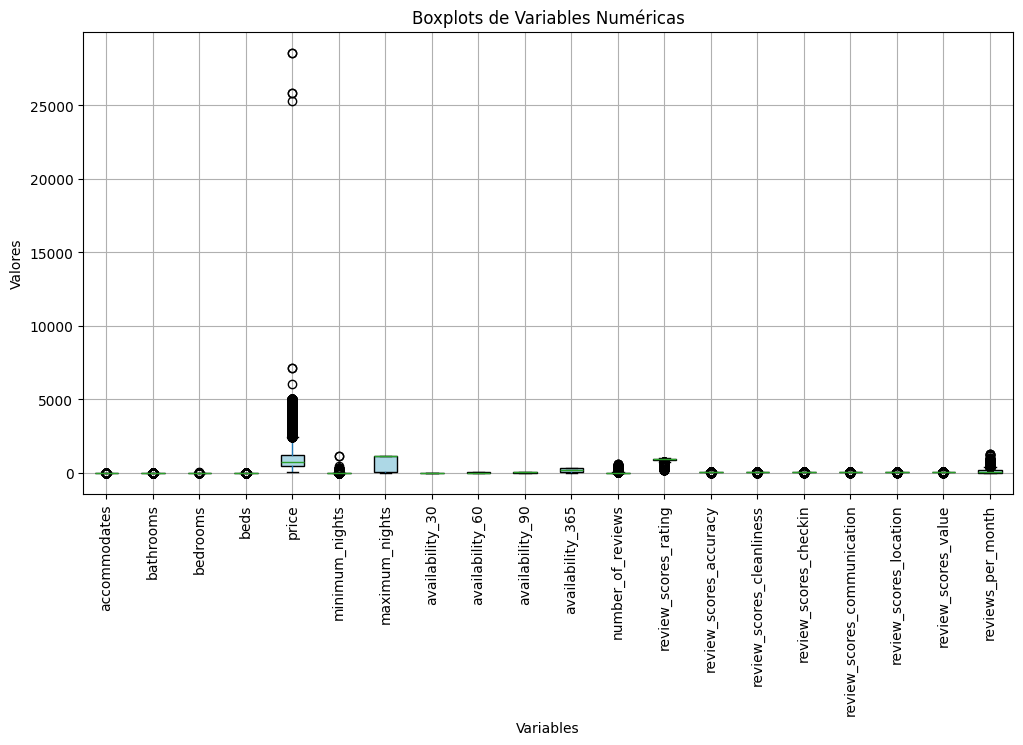

In [9]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

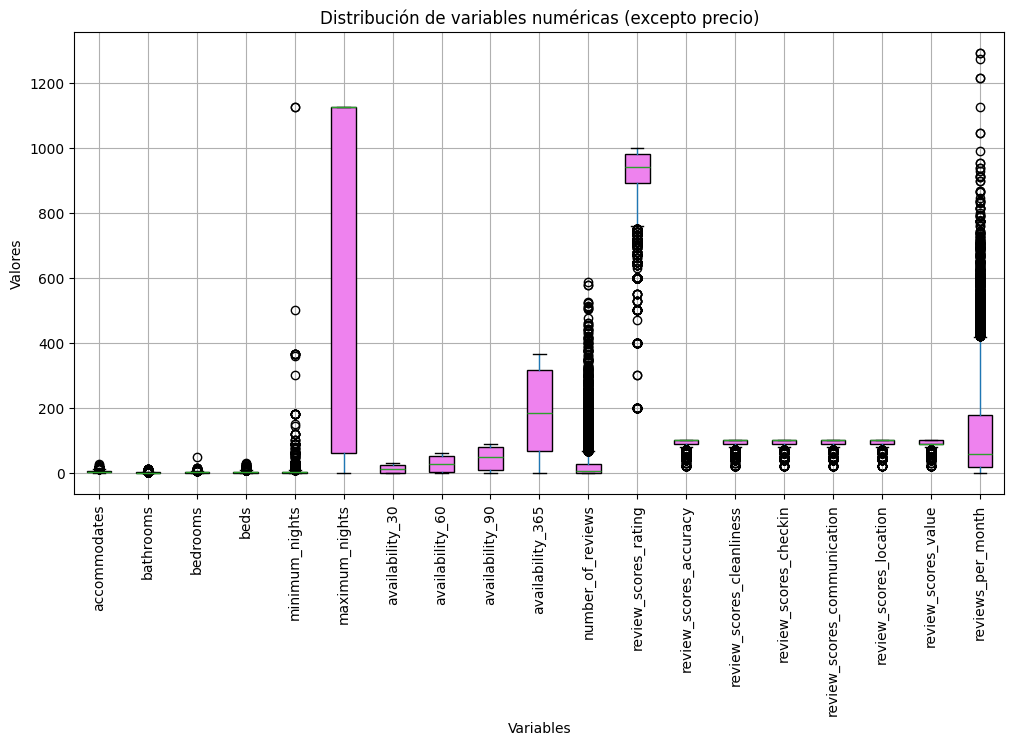

In [10]:
# nuevo gráfico sin precio vara visualizar mejor las demás variables

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

## Limpieza de datos (Data Cleaning)

### Tratamiento de duplicados

In [11]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 15000
Total de duplicados exactos: 5000
El número de apartment_id duplicados es: 5350


In [12]:
# Filtar las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]

# Mostrar las filas duplicadas
duplicados_filas.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2.0,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,True,7,20,40,130,78,2010-02-01,2017-05-09,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,75.0,spain,malaga,2018-07-31
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,True,26,31,31,270,148,2011-05-01,NaT,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,142.0,spain,sevilla,2019-07-29
13,89776,Modernist flat Downtown Casa Estap� | Barcelona,"Unique and rare ! Stay in the Casa Estap�, jew...",488151,el Fort Pienc,Eixample,Entire home/apt,4,1.0,1.0,2.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",650.0,3,365,True,7,18,41,224,322,2011-10-11,2019-01-12,960.0,100.0,100.0,100.0,100.0,100.0,100.0,True,327.0,spain,barcelona,2019-12-10
14,89954,Amazing apt in the historic center,"Beautiful, new, central and cosy apartment per...",487095,Palacio,Centro,Entire home/apt,6,1.0,2.0,3.0,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Elev...",1030.0,2,20,True,27,48,49,61,181,2011-01-07,2018-01-11,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,202.0,spain,madrid,2018-11-07
17,103386,"Central 2 Bedrooms, 3/5 pers. Wi-Fi","This is Edificio Palomar Apartments, I will tr...",508042,EL PILAR,CIUTAT VELLA,Entire home/apt,5,1.0,2.0,3.0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",840.0,1,14,True,17,38,64,229,13,2011-01-11,NaT,930.0,100.0,100.0,100.0,90.0,90.0,100.0,False,13.0,spain,valencia,2019-10-31
18,107437,A beautiful villa in Barcelona,"A conserved, period villa situated in the mids...",556626,"Vallvidrera, el Tibidabo i les Planes",Sarri�-Sant Gervasi,Entire home/apt,8,2.0,5.0,6.0,"TV,Wifi,Kitchen,Free parking on premises,Smoki...",2200.0,3,120,True,12,41,59,250,34,2011-08-07,NaT,930.0,100.0,100.0,100.0,100.0,100.0,90.0,True,38.0,spain,barcelona,2018-10-10
19,121210,"BIG ROOM IN CITY CENTER,NEAR BEACH!","The best room in Barcelona! Nice room, in a c...",594334,el Fort Pienc,Eixample,Private room,2,0.0,1.0,1.0,"TV,Internet,Wifi,Kitchen,Elevator,Washer,Essen...",510.0,5,365,True,13,38,68,68,154,NaT,2017-09-12,890.0,90.0,90.0,90.0,90.0,90.0,90.0,False,184.0,spain,barcelona,2018-04-12
20,128463,Private Suite in residential area!!,My House is located in the quiet district of S...,635253,Sants,Sants-Montju�c,Private room,2,2.0,1.0,1.0,"TV,Wireless Internet,Air conditioning,Kitchen,...",300.0,3,1125,True,3,16,28,264,184,2011-03-09,NaT,970.0,100.0,100.0,100.0,100.0,90.0,100.0,True,235.0,spain,barcelona,2018-02-07
21,131987,SEVILLA CENTER 4 PAX.GREAT REVIEWS 1 BR+WIFI+AC,OFFER SPRING & SUMMER : -5 or 6 nights=5% disc...,1535528,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,1.0,2.0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",690.0,4,365,True,30,60,90,163,235,2012-12-03,2020-12-03,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,235.0,spain,sevilla,2020-05-30
22,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1.0,1.0,1.0,"Wireless Internet,Wheelchair accessible,Elevat...",470.0,2,365,True,22,52,82,357,32,2011-04-07,2016-04-08,870.0,80.0,90.0,90.0,90.0,90.0,80.0,False,42.0,spain,barcelona,2017-09-12


Se decidió borrar solo los duplicados exactos y mantener los parciales (que son duplicados de la columna apartment_id) para que cada perfil decida cómo los tratará en su análisis.

In [13]:
df = df.drop_duplicates()

### Valores nulos

In [14]:
df.isnull().sum()

apartment_id                      0
name                              3
description                     138
host_id                           0
neighbourhood_name                0
neighbourhood_district         3921
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                   17
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              6897
last_review_date               6944
review_scores_rating           2709
review_scores_accuracy         2718
review_scores_cleanliness      2712
review_scores_checkin          2723
review_scores_communication 

#### Eliminación de columnas irrelevantes

In [15]:
df = df.drop(columns=['description', 'country'])

#### Función de imputación de nulos

In [16]:
def imputación_desde_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo y completa sus valores faltantes 
    con los del más reciente SIN eliminar registros.
    Devuelve el df con valores actualizados y un resumen de los cambios.
    """

    df = df.copy()  # no modifica el df original
    resumen = []

    # filtra solo duplicadas por id_col
    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena (más antiguo primero)
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores faltantes en el registro antiguo
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si hubo cambios, se guarda en el resumen
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro reciente": latest_index,
                    "columnas actualizadas": actualizacion
                })

    # convierte el resumen en df
    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df, resumen_cambios = imputación_desde_duplicados(df, id_col='apartment_id', date_col='insert_date')

#### Neighbourhood_district

In [17]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

#### Características numéricas del alojamiento
Se sustituyen los nulos por 1, bajo el entendido de que en todos los alojamientos por defecto hay 1 cama, 1 baño y aloja a al menos a 1 persona.

In [18]:
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

#### Precio

In [19]:
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

#### Columnas de texto

In [20]:
df["name"].fillna("Desconocido", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")

C:\Users\Ivan\AppData\Local\Temp\ipykernel_31084\1815731930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["name"].fillna("Desconocido", inplace=True)


#### Verificación

In [21]:
df.isnull().sum()

apartment_id                      0
name                              0
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              6883
last_review_date               6901
review_scores_rating           2685
review_scores_accuracy         2694
review_scores_cleanliness      2688
review_scores_checkin          2699
review_scores_communication    2690
review_scores_location      

El df resultante tiene únicamente nulos en las variables relativas a las reseñas, lo cual es esperable, ya que no todos los avisos tendrán reseñas.

## Transformación de Datos (Data Transformation)

In [22]:
# Definir las columnas numéricas sobre las que calcular la media
# columnas_media = ["availability_30", "availability_60", "availability_90", "availability_365"]

# # Agrupar por 'apartment_id' y calcular la media de las columnas seleccionadas
# df_agrupado = df.groupby("apartment_id", as_index=False)[columnas_media].mean()

# # Mostrar el resultado
# # Si usas Jupyter Notebook, puedes usar display() para mejor visualización
# from IPython.display import display
# display(df_agrupado)

In [23]:
# print(df_agrupado[df_agrupado['apartment_id'] == 343864])

In [24]:
# df_agrupado.duplicated().sum()

## Reducción de Datos (Data Reduction)

# ANÁLISIS ESTADÍSTICO

### ANÁLISIS DISTRIBUCIÓN

In [ ]:
availability_cols = ["availability_30", "availability_60", "availability_90", "availability_365"]

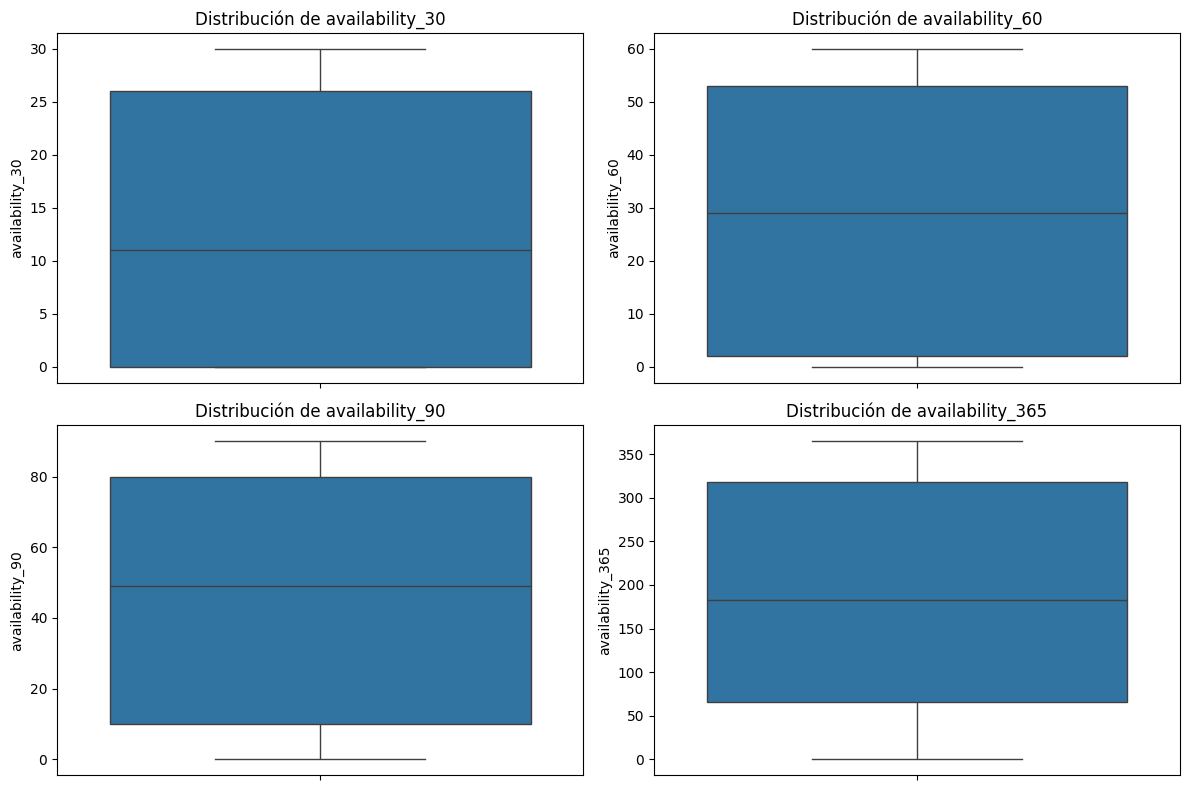

In [41]:
# Crear la figura con subgráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Recorrer las columnas y asignarlas a los subgráficos
for i, col in enumerate(availability_cols):
    row, col_idx = divmod(i, 2)  # Calcular posición en la cuadrícula
    sns.boxplot(y=df[col], ax=axes[row, col_idx])  # Crear boxplot
    axes[row, col_idx].set_title(f'Distribución de {col}')  # Agregar título

# Ajustar diseño para evitar superposición
plt.tight_layout()
plt.show()

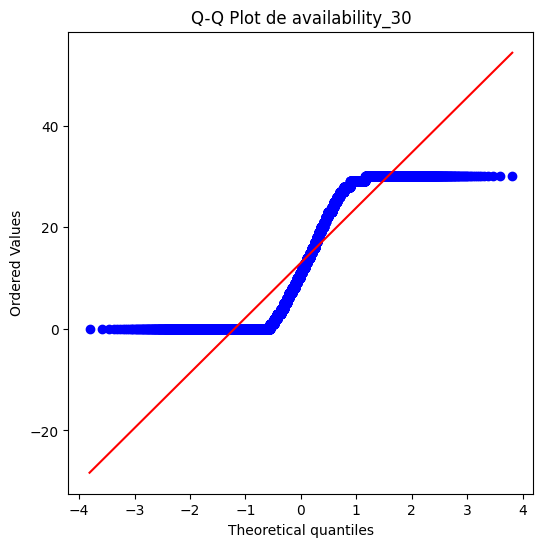

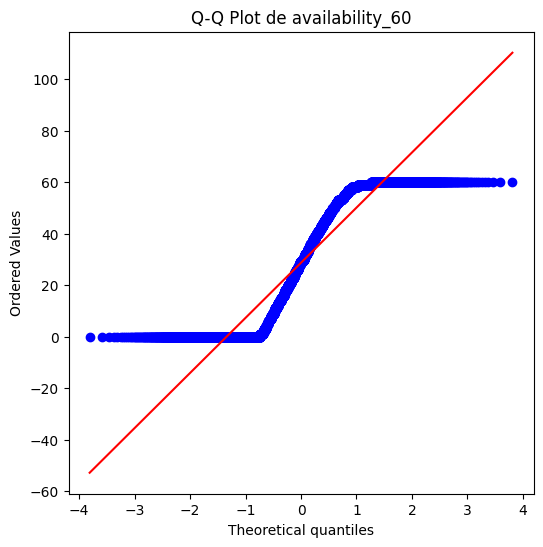

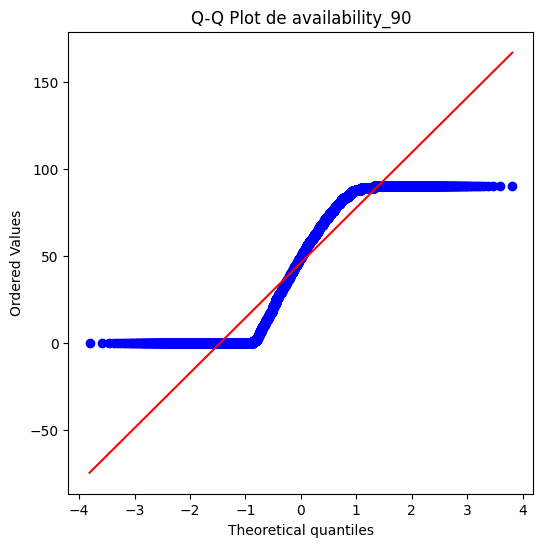

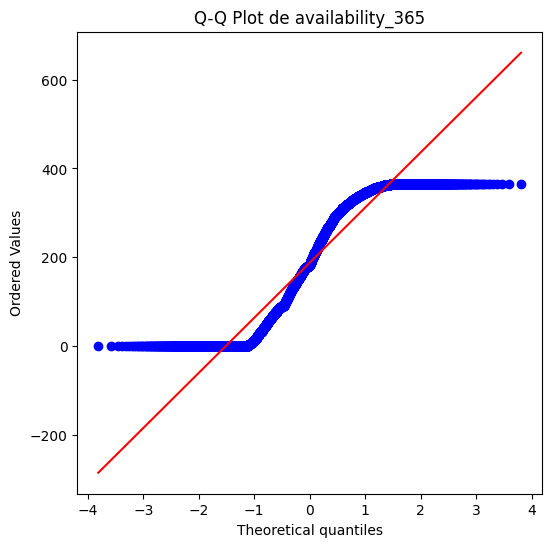

In [ ]:
import scipy.stats as stats

for col in availability_cols:
    plt.figure(figsize=(6, 6))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}')
    plt.show()

In [ ]:
from scipy.stats import shapiro

for col in availability_cols:
    stat, p = shapiro(df[col].dropna())  # Se eliminan valores nulos para evitar errores
    print(f"Shapiro-Wilk Test para {col}: Estadístico={stat}, p-valor={p}")
    if p > 0.05:
        print("No se rechaza la normalidad (puede ser normal)")
    else:
        print("Se rechaza la normalidad (no es normal)")

Shapiro-Wilk Test para availability_30: Estadístico=0.8387881507678311, p-valor=5.477928267802339e-72
Se rechaza la normalidad (no es normal)
Shapiro-Wilk Test para availability_60: Estadístico=0.8678258968501431, p-valor=6.672262995622411e-68
Se rechaza la normalidad (no es normal)
Shapiro-Wilk Test para availability_90: Estadístico=0.8782560388226207, p-valor=3.0165700770161904e-66
Se rechaza la normalidad (no es normal)
Shapiro-Wilk Test para availability_365: Estadístico=0.8985545410730674, p-valor=1.1955955704510382e-62
Se rechaza la normalidad (no es normal)


c:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [31]:
from scipy.stats import mannwhitneyu

for col in availability_cols:
    group1 = df[df["is_instant_bookable"] == 0][col].dropna()
    group2 = df[df["is_instant_bookable"] == 1][col].dropna()
    
    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
    print(f"Mann-Whitney U Test para {col}: Estadístico={stat}, p-valor={p}")

Mann-Whitney U Test para availability_30: Estadístico=12043765.5, p-valor=0.3498387666728776
Mann-Whitney U Test para availability_60: Estadístico=12118410.5, p-valor=0.6882414650725159
Mann-Whitney U Test para availability_90: Estadístico=12206790.0, p-valor=0.82368182617346
Mann-Whitney U Test para availability_365: Estadístico=12269534.5, p-valor=0.5073170990366069


# Comparaciones con numericas de instant_booking

In [38]:
df["is_instant_bookable"] = df["is_instant_bookable"].astype(int)


In [ ]:
# Seleccionar columnas numéricas (excepto is_instant_bookable)
numeric_cols = df.select_dtypes(include=['number']).columns.drop("is_instant_bookable", errors="ignore")

# Listas para almacenar resultados
significativas = []
no_significativas = []

# Aplicar Mann-Whitney U Test a cada variable numérica
for col in numeric_cols:
    group1 = df[df["is_instant_bookable"] == 0][col].dropna()
    group2 = df[df["is_instant_bookable"] == 1][col].dropna()
    
    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
    
    if p < 0.05:
        significativas.append((col, p))
    else:
        no_significativas.append((col, p))

# Mostrar resultados organizados
print("Variables con diferencias significativas:")
for col, p in significativas:
    print(f"- {col}: p-valor = {p}")

print("\n Variables SIN diferencias significativas:")
for col, p in no_significativas:
    print(f"- {col}: p-valor = {p}")

# PARA QUE FUERA VALIDO TENDRIA LA DISTRIBUCIÓN DE

# Si tienen distribuciones totalmente distintas usar KS test(Kolmogorov smirnof)

# Si tienen distribuciones muy sesgadas o con outliers(posibles transformaciones como log1p o sqrt) 


Variables con diferencias significativas:
- apartment_id: p-valor = 2.7925990085133285e-115
- host_id: p-valor = 6.1793811452670345e-102
- accommodates: p-valor = 5.238452110438278e-27
- bedrooms: p-valor = 0.00020376515751069585
- beds: p-valor = 5.238452110438278e-27
- price: p-valor = 4.035378340280401e-15
- minimum_nights: p-valor = 2.1010026965023734e-106
- maximum_nights: p-valor = 0.0024396545286671624
- review_scores_rating: p-valor = 1.274363274022261e-13
- review_scores_accuracy: p-valor = 3.4378235621299465e-08
- review_scores_cleanliness: p-valor = 0.00023293584484267445
- review_scores_checkin: p-valor = 1.437168364109427e-16
- review_scores_communication: p-valor = 1.8855378453527663e-11
- review_scores_value: p-valor = 3.9843124623163197e-13
- reviews_per_month: p-valor = 3.637249008137215e-26

 Variables SIN diferencias significativas:
- bathrooms: p-valor = 0.8969378109925156
- availability_30: p-valor = 0.3498387666728776
- availability_60: p-valor = 0.688241465072515

# Comparaciones categoricas instant booking

In [ ]:
# Seleccionar columnas numéricas (excepto is_instant_bookable)
numeric_cols = df.select_dtypes(include=['number']).columns.drop("is_instant_bookable")

# Aplicar Mann-Whitney U Test a cada variable numérica
for col in numeric_cols:
    group1 = df[df["is_instant_bookable"] == 0][col].dropna()
    group2 = df[df["is_instant_bookable"] == 1][col].dropna()
    
    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
    
    print(f"Mann-Whitney U Test para {col}: Estadístico={stat}, p-valor={p}")
    
    if p < 0.05:
        print("🔴 Diferencia significativa entre los grupos")
    else:
        print("🟢 No hay diferencia significativa")


# ANÁLISIS POR CIUDAD

## Exportación del dataset limpio

In [ ]:
# print(f'Total de registros del dataset: {registros_totales}')
# print(f'Total de duplicados exactos: {df.duplicated().sum()}')
# print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 15000
Total de duplicados exactos: 0
El número de apartment_id duplicados es: 5350


In [ ]:
# df.to_csv("../Data/tourist_accommodation_clean.csv", index=False)